In [3]:
# imports of utilities like numpy, pandas and etc.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import of data
Data import and division to X and Y sets

In [ ]:
# Import of dry beans data from local folder
# You can import this data from https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset
# run this only when notebook opened in colab

#uploaded = files.upload()

#for fn in uploaded.keys():
#    print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

In [4]:
data = pd.read_excel('Dry_Bean_Dataset.xlsx')
data.rename(columns={'AspectRation':'AspectRatio'},inplace=True) # obvious spelling correction
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [3]:
Xdata=data.drop('Class',axis=1)
Ydata=data["Class"]

### Decomposition with PCA to 2D representation

In [4]:
dataPCA=data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataPCA['code'] = LE.fit_transform(data['Class'])

XdataPCA=dataPCA.drop('code',axis=1)
XdataPCA=XdataPCA.drop('Class',axis=1)
YdataPCA=data["code"]
print (list(LE.classes_))


['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']


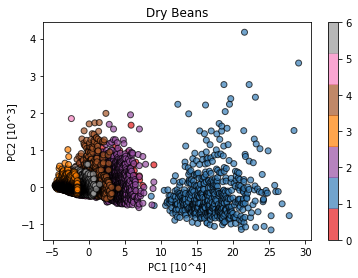

In [19]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
Xdata2D= pca2.fit_transform(XdataPCA)
Xdata2D[:,1]=Xdata2D[:,1]/1000
Xdata2D[:, 0]=Xdata2D[:, 0]/10000
plt.scatter(Xdata2D[:, 0], Xdata2D[:, 1],c=dataPCA['code'], cmap=plt.cm.get_cmap('Set1',7), edgecolor='k', alpha=0.7)
# wykonanie wykresu
plt.xlabel('PC1 [10^4]')
plt.ylabel('PC2 [10^3]')
plt.title("Dry Beans")
plt.colorbar()
plt.savefig('PC_DryBeans2D.png')

## Manual reduction to 8 dimensions

In [7]:
#Elimination of several features to remove too much corelated features (less than -0.9 or more 0.9)
data8= data.drop(['Area','Perimeter','ConvexArea','EquivDiameter','Compactness',
                    'Eccentricity', 'ShapeFactor1','ShapeFactor3'],axis=1)
# correlation of left features, saving and download
#beans8Corr=beans8.corr()
#beans8Corr.to_csv('beans8Corr.csv')
#files.download('beans8Corr.csv')
Xdata8=data8.drop('Class',axis=1)
Ydata=data["Class"]

# Cross validation research

In [5]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate

from sklearn.utils import shuffle

In [8]:
from sklearn.utils import shuffle
dataCV=data8
dataCV=shuffle(dataCV, random_state=7)

XdataCV=dataCV.drop('Class',axis=1)
YdataCV=dataCV["Class"]

In [9]:
gNB= GaussianNB()
svc= SVC(kernel='poly',C=1E5,random_state=7)
dTree=  DecisionTreeClassifier(max_leaf_nodes=16,max_depth=5, random_state=7)
rfc=RandomForestClassifier(random_state=7)

vc= VotingClassifier( estimators=[('gNB',gNB),('svc',svc),('rf',rfc)], voting='hard')

modelList = [ gNB ,svc,dTree,rfc]

In [10]:
for model in modelList:
    print(model)
    cv_res= cross_validate(model, XdataCV,YdataCV, cv=5)
    print('Test score = '+ str(cv_res['test_score']) +'  mean= '+ str(np.mean(cv_res['test_score'])))
    print('Fit time = '+ str(cv_res['fit_time']) +'  mean= '+str(np.mean(cv_res['fit_time'])))
    print('Score time = '+ str(cv_res['score_time'])+'  mean= '+str(np.mean(cv_res['score_time'])))
    

GaussianNB()
Test score = [0.90451708 0.91550331 0.90742101 0.91109478 0.90852314]  mean= 0.9094118650200768
Fit time = [0.01189065 0.00999451 0.01000881 0.00899863 0.00999928]  mean= 0.010178375244140624
Score time = [0.00402141 0.00199389 0.00299048 0.0030005  0.00293088]  mean= 0.0029874324798583986
SVC(C=100000.0, kernel='poly', random_state=7)
Test score = [0.90892398 0.91770757 0.91109478 0.90411462 0.91146216]  mean= 0.9106606227787728
Fit time = [16.08084369 16.76552963 18.05030513 14.39134121 14.76675749]  mean= 16.01095542907715
Score time = [0.16410136 0.16950107 0.17300177 0.16100097 0.16600156]  mean= 0.16672134399414062
DecisionTreeClassifier(max_depth=5, max_leaf_nodes=16, random_state=7)
Test score = [0.87917738 0.87986774 0.87178545 0.88464364 0.87362234]  mean= 0.877819310993542
Fit time = [0.04103732 0.03899813 0.03799939 0.03799987 0.03599954]  mean= 0.0384068489074707
Score time = [0.00315952 0.00200057 0.00300026 0.00200129 0.00200081]  mean= 0.0024324893951416016

In [12]:
model =vc
print(model)
cv_res= cross_validate(model, XdataCV,YdataCV, cv=5)
print('Test score = '+ str(cv_res['test_score']) +'  mean= '+ str(np.mean(cv_res['test_score'])))
print('Fit time = '+ str(cv_res['fit_time']) +'  mean= '+str(np.mean(cv_res['fit_time'])))
print('Score time = '+ str(cv_res['score_time'])+'  mean= '+str(np.mean(cv_res['score_time'])))

VotingClassifier(estimators=[('gNB', GaussianNB()),
                             ('svc',
                              SVC(C=100000.0, kernel='poly', random_state=7)),
                             ('rf', RandomForestClassifier(random_state=7))])
Test score = [0.91369813 0.92432035 0.91807494 0.91917708 0.92211609]  mean= 0.9194773182860349
Fit time = [17.76549411 17.84792519 19.44974494 15.67209959 15.99291086]  mean= 17.345634937286377
Score time = [0.21523643 0.21698833 0.21200013 0.21007133 0.21116805]  mean= 0.21309285163879393


## Decision Tree visualisation

In [44]:
dTree=  DecisionTreeClassifier(max_leaf_nodes=16,max_depth=5, random_state=7)
#%timeit  // you can use timeit to measure the time of fitting
dataDT=data8
dataDT=shuffle(dataDT, random_state=7)

XdataDT=dataDT.drop('Class',axis=1)
YdataDT=dataDT["Class"]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(XdataDT,YdataDT,test_size=0.2, random_state=7)
dTree.fit(Xtrain,Ytrain)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=16, random_state=7)

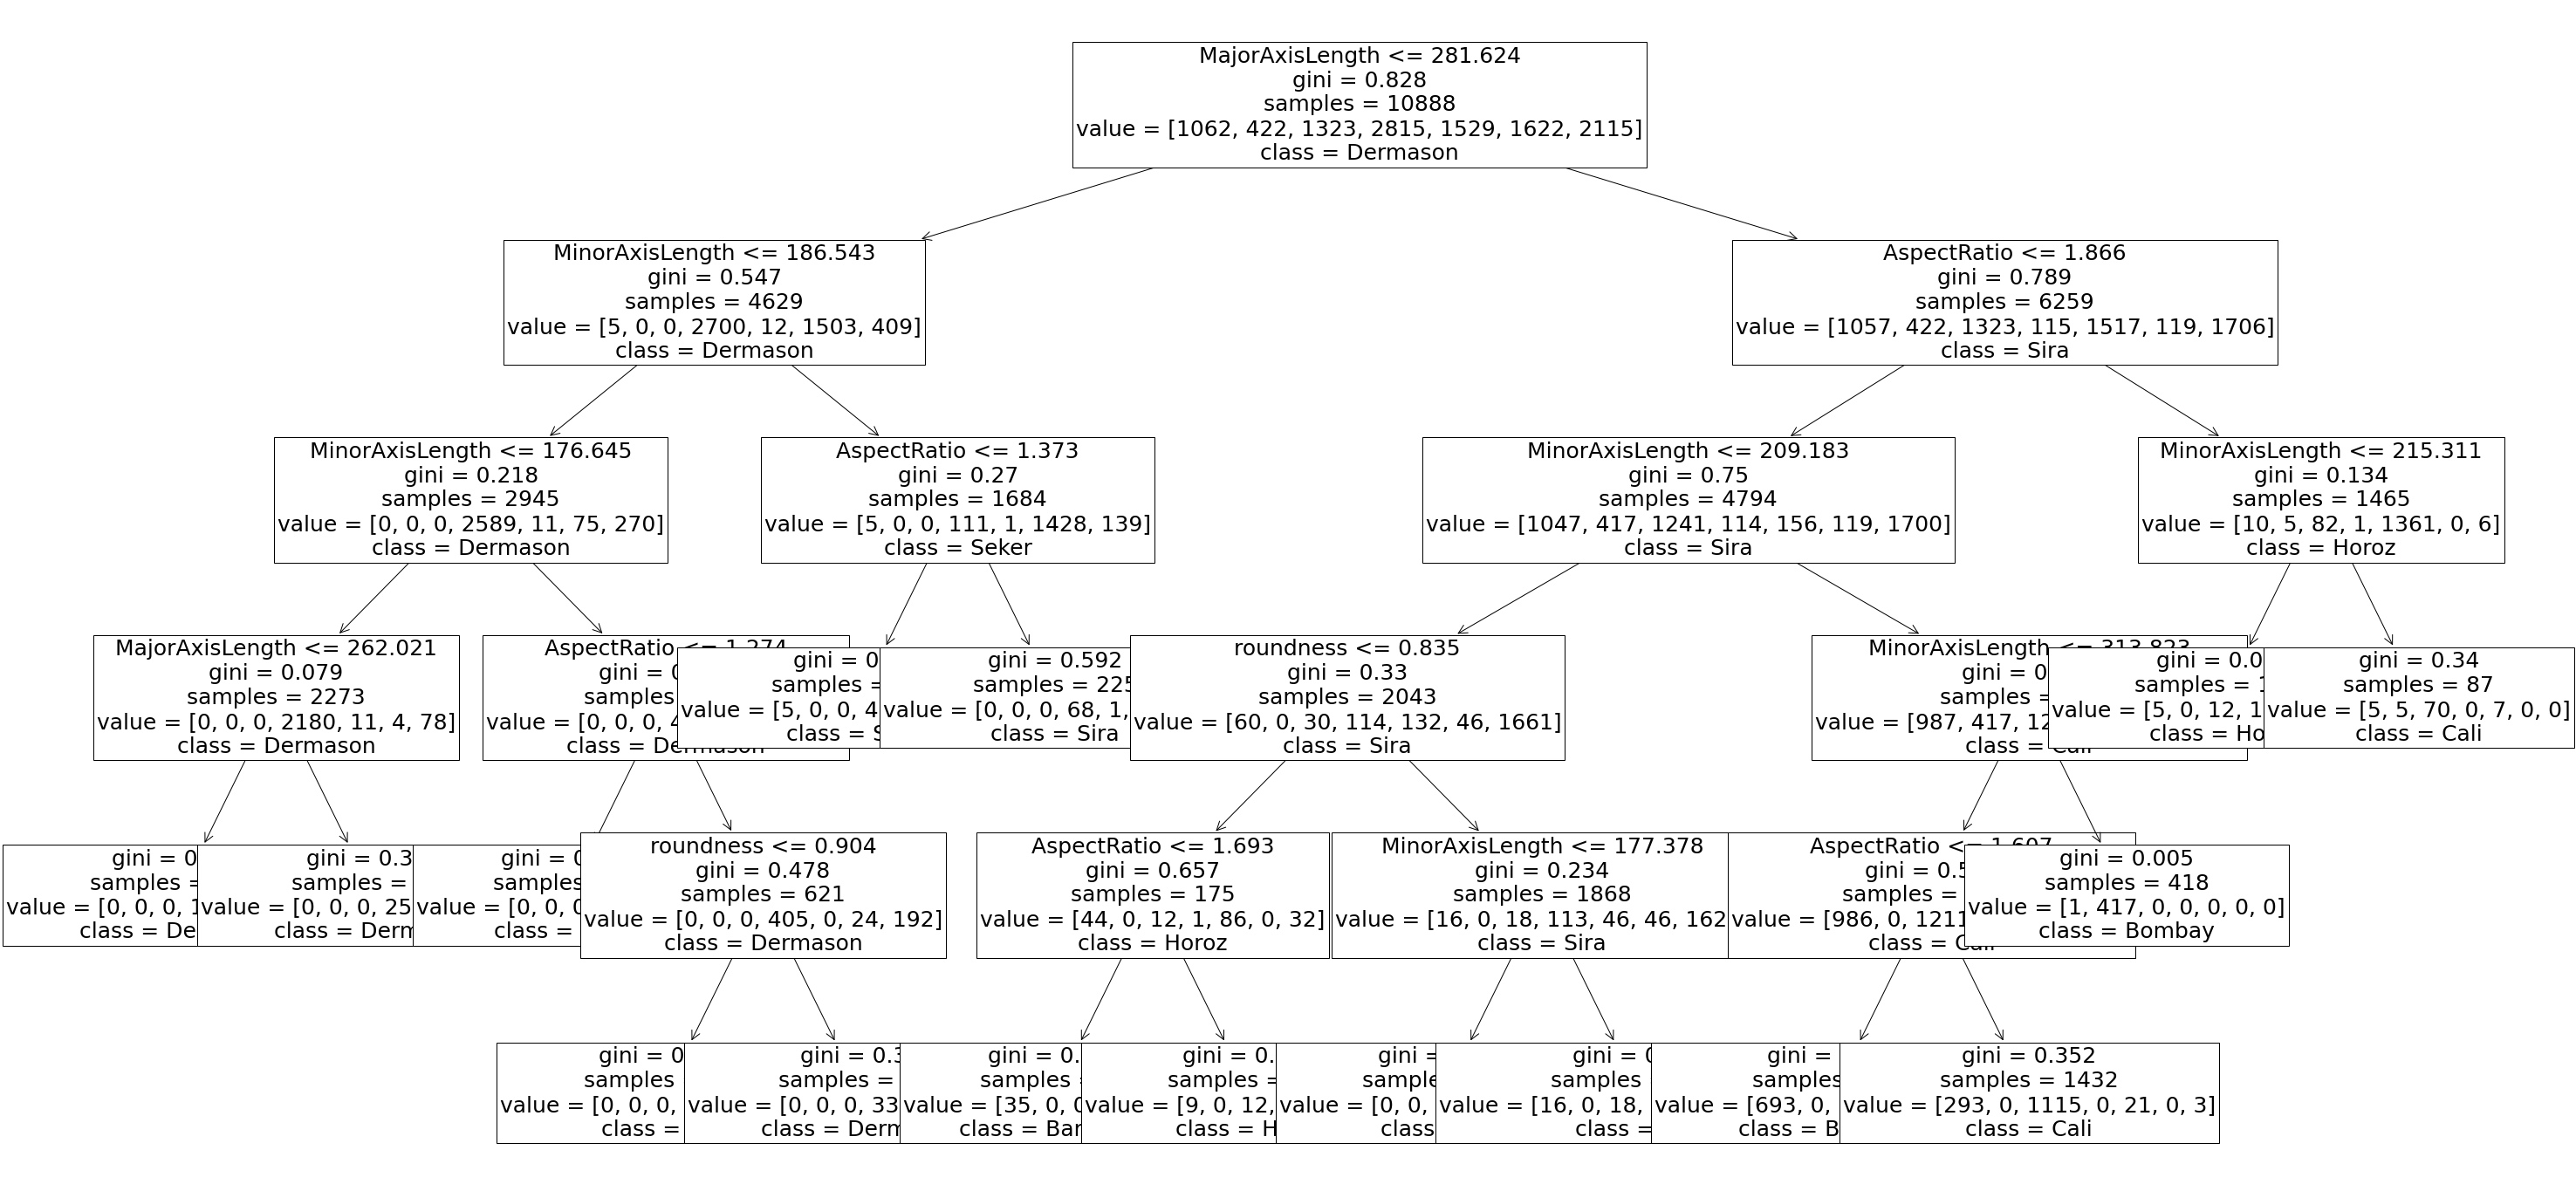

In [49]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
figDT = plt.figure(figsize=(50,25))
tree.plot_tree(dTree, feature_names=data8.columns, 
          class_names=['Barbunya', 'Bombay', 'Cali', 'Dermason',  'Horoz', 'Seker', 'Sira'],
          fontsize=25)
figDT.savefig('dt.png')
#files.download('dt.png')

## Closer look on Random Forest results

In [35]:
from sklearn.model_selection import train_test_split
dataRF=shuffle(data8,random_state=7)
Xdata=dataRF.drop('Class',axis=1)
Ydata=dataRF["Class"]

Xtrain,Xtest,Ytrain,Ytest=train_test_split(Xdata,Ydata,test_size=0.2, random_state=7)

In [38]:
from sklearn.metrics import accuracy_score
rndStates=[7,107,207,307,407]
accList=[]
for r in rndStates:
    rndForest = RandomForestClassifier(random_state=r)
    dataRF=shuffle(data8,random_state=r)
    Xdata=dataRF.drop('Class',axis=1)
    Ydata=dataRF["Class"]
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(Xdata,Ydata,test_size=0.2, random_state=r)
    rndForest.fit(Xtrain,Ytrain)
    Ypred=rndForest.predict(Xtest)
    accList.append(accuracy_score(Ypred,Ytest))

In [39]:
print('Acc score = '+ str(accList) +'  mean= '+ str(np.mean(accList)))

Acc score = [0.9346309217774513, 0.9232464193903782, 0.9232464193903782, 0.9269188395152406, 0.9357326478149101]  mean= 0.9287550495776717


None


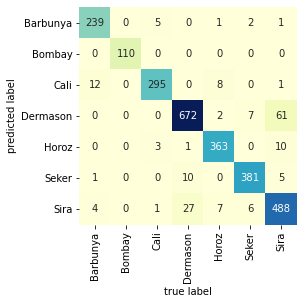

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Ytest, Ypred)
mylist= data.Class.unique()
mylist = mylist.sort()
print(mylist)
#print (mat)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu",cbar=False,
            yticklabels=['Barbunya', 'Bombay', 'Cali', 'Dermason',  'Horoz', 'Seker', 'Sira'],
            xticklabels=['Barbunya', 'Bombay', 'Cali', 'Dermason',  'Horoz', 'Seker', 'Sira']  )
plt.xlabel('true label')
plt.ylabel('predicted label');

plt.savefig('heatMap.png')
#files.download('heatMap.png')

## Influence of dimension reduction
We check also RF and SVC on full data and data reduced to 8 dim by PCA

### FULL DATA

In [18]:
dataCV=data
dataCV=shuffle(dataCV, random_state=7)

XdataCV=dataCV.drop('Class',axis=1)
YdataCV=dataCV["Class"]

In [19]:
svc= SVC(kernel='poly',C=1E5,random_state=7)
rfc=RandomForestClassifier(random_state=7)
modelList = [svc, rfc]

In [15]:
for model in modelList:
    print(model)
    cv_res= cross_validate(model, XdataCV,YdataCV, cv=5)
    print('Test score = '+ str(cv_res['test_score']) +'  mean= '+ str(np.mean(cv_res['test_score'])))
    print('Fit time = '+ str(cv_res['fit_time']) +'  mean= '+str(np.mean(cv_res['fit_time'])))
    print('Score time = '+ str(cv_res['score_time'])+'  mean= '+str(np.mean(cv_res['score_time'])))

SVC(C=100000.0, kernel='poly', random_state=7)
Test score = [0.90451708 0.91844232 0.90962528 0.90889052 0.90852314]  mean= 0.909999668106043
Fit time = [26.08708572 27.86575484 28.76581597 28.31745386 23.17543244]  mean= 26.84230856895447
Score time = [0.24300051 0.25360751 0.24209571 0.25307107 0.24749565]  mean= 0.24785408973693848
RandomForestClassifier(random_state=7)
Test score = [0.91920676 0.92762675 0.92138134 0.9235856  0.92578986]  mean= 0.9235180597533246
Fit time = [2.4797008  2.48612857 2.60197854 2.50771022 2.50235987]  mean= 2.5155755996704103
Score time = [0.03799415 0.03700042 0.03899884 0.04106975 0.03600049]  mean= 0.03821272850036621


### PCA reduced data

In [20]:
from sklearn.decomposition import PCA
pca8 = PCA(n_components=8)
XdataPCA= pca8.fit_transform(XdataCV)

In [21]:
for model in modelList:
    print(model)
    cv_res= cross_validate(model, XdataPCA,YdataCV, cv=5)
    print('Test score = '+ str(cv_res['test_score']) +'  mean= '+ str(np.mean(cv_res['test_score'])))
    print('Fit time = '+ str(cv_res['fit_time']) +'  mean= '+str(np.mean(cv_res['fit_time'])))
    print('Score time = '+ str(cv_res['score_time'])+'  mean= '+str(np.mean(cv_res['score_time'])))

SVC(C=100000.0, kernel='poly', random_state=7)
Test score = [0.81013588 0.82182219 0.80345334 0.80455547 0.81778104]  mean= 0.8115495859015764
Fit time = [16.96172595 14.94544983 15.21229672 13.19906211 10.27870202]  mean= 14.119447326660156
Score time = [0.38192892 0.38298988 0.37393093 0.38065529 0.37400198]  mean= 0.37870140075683595
RandomForestClassifier(random_state=7)
Test score = [0.92324642 0.93570904 0.92138134 0.92542248 0.92321822]  mean= 0.9257954998957096
Fit time = [1.40105653 1.38815212 1.37017107 1.36300206 1.37149477]  mean= 1.3787753105163574
Score time = [0.03599834 0.03593087 0.03600049 0.03600025 0.03700089]  mean= 0.03618617057800293


#### This is end by now. ANN will be done in another notebook not to mix all stuff together.